In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics


In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

In [ ]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [ ]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


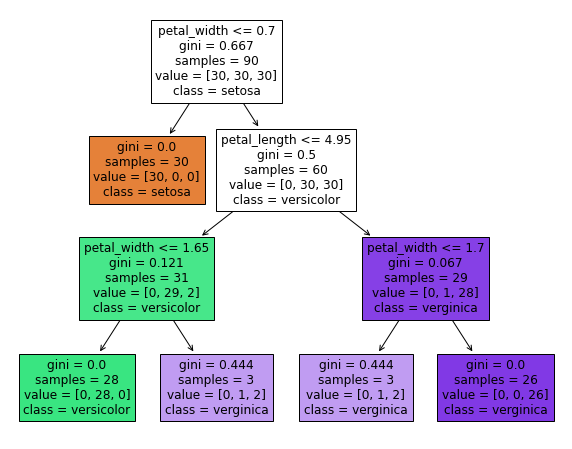

In [ ]:
fn=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
cn=['setosa','versicolor','verginica']
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

In [47]:
result = mod_dt.predict([[5.0, 3.0, 1.2, 0.3]])
result[0].strip('')

'setosa'

In [ ]:
mod_dt.predict([[5.0, 3.0, 1.2, 0.3],[3.0, 2.0, 4.1, 1.2]])

array(['setosa', 'versicolor'], dtype=object)

# Fast API 사용하기 

In [ ]:
!pip install fastapi uvicorn pyngrok nest_asyncio aiofiles python-multipart

     |████████████████████████████████| 52 kB 650 kB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 745 kB 38.9 MB/s 
     |████████████████████████████████| 60 kB 6.4 MB/s 
     |████████████████████████████████| 10.1 MB 23.8 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=c57c4876e17a73545e1e120c7241e27e76d6666a214fd2630d4bd07a27fccad7
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=efb6958deb9cde3ddd27fa2f66654796e77d690bd9a8ba89a02008bf2a01b67a
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534ffdcc0972f78c5758f89881602175d48a8bcd2c
Successfully built pyngrok python-multipart


In [ ]:
!pip install aiofiles

In [58]:
%%writefile templates/item.html

<html>
<head>
    <h1>IRIS classifier</h1>
    <link href="{{ url_for('static', path='/styles.css') }}" rel="stylesheet">
</head>

<body>
    <h4> * Sepal Length : {{sl}} </h4>
    <h4> * Sepal Width : {{sw}}  </h4>
    <h4> * Petal Length : {{pw}} </h4>
    <h4> * Petal Width : {{pl}} </h4>

    <h3> Result Species: <span style="color: orange">{{id}}</span> </h3>
</body>
</html>

Overwriting templates/item.html


In [55]:
%%writefile static/styles.css
h1 {
    color: black;
}

Overwriting static/styles.css


In [56]:
def get_preict():
  result= mod_dt.predict([[5.0, 3.0, 1.2, 0.3]])
  return result

In [59]:
from fastapi import FastAPI, Request
from fastapi.responses import FileResponse
from fastapi.responses import HTMLResponse
from fastapi.staticfiles import StaticFiles
from fastapi.templating import Jinja2Templates
from typing import List
import os
import nest_asyncio
from pyngrok import ngrok
import uvicorn

app = FastAPI()

@app.get('/')
def read_root():
    return {'message': '= Iris Classification'}

app.mount("/static", StaticFiles(directory="static"), name="static")
templates = Jinja2Templates(directory="templates")

@app.get("/iris/", response_class=HTMLResponse)
async def read_item(request: Request, sl:float, sw:float, pl:float, pw: float):
    result = get_predict([[sl, sw, pl, pw]])
    return templates.TemplateResponse("item.html", {"request": request, 'sl':sl, 'sw':sw, 'pl':pl, 'pw':pw, 'id': result[0]})

ngrok_tunnel = ngrok.connect(8000)
print ('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, host='0.0.0.0', port=8000)

Public URL: http://521c-35-196-165-190.ngrok.io


INFO:     Started server process [65]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     114.203.149.236:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     114.203.149.236:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     1.254.179.100:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     1.254.179.100:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     114.203.149.236:0 - "GET /iris/?sl=2.2&sw=1.1&pl=5.1&pw=3.9 HTTP/1.1" 200 OK
INFO:     114.203.149.236:0 - "GET /iris/?sl=2.2&sw=1.1&pl=5.1&pw=3.9 HTTP/1.1" 200 OK
INFO:     114.203.149.236:0 - "GET /static/styles.css HTTP/1.1" 200 OK
INFO:     114.203.149.236:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     175.209.64.54:0 - "GET /iris/?sl=2.2&sw=1.1&pl=5.1&pw=3.9 HTTP/1.1" 200 OK
INFO:     175.209.64.54:0 - "GET /static/styles.css HTTP/1.1" 200 OK
INFO:     175.209.64.54:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     175.209.64.54:0 - "GET /iris/?sl=2.2&sw=3.1&pl=5.1&pw=3.2 HTTP/1.1" 200 OK
INFO:     175.209.64.54:0 - "GET /static/styles.css HTTP/1.1" 304 Not Modified
INFO:     175.209.64.54:0 - "GET /iris/?sl=2.2&sw=3

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [65]
